###**Heatmap PMI Z Score **

Purchasing Managers Index, sigue las expectativas económicas de los fabricantes. Su valor nos comunica si ellos están contratando y gastando (con un valor sobre 50) o si esperan una contracción económica y por tanto están reduciendo costos (bajo 50). La relevancia de este índice está en que mantiene un ojo sobre las decisiones que se toman en las empresas. 

**Añadir el uso de zscore nos ayuda a saber como está el país en relación a sus niveles históricos, esto es muy útil cuando tenemos series largas. Ya que podremos ver como cambian las perpestivas económicas dentro de cada país de acuerdo a sus estándares.**

**Esto nos entrega información adicional a como se mueven las perspectivas económicas de un país de acuerdo a su tendencia.**

El trabajo se inspira en el trabajo de [JPMorgan](https://www.zerohedge.com/news/2013-07-01/five-years-global-pmi-data-one-heatmap)

Por lo general a todos los países tienen un PMI. En este caso utilizaremos los disponibles en el listado de [Tradeidea](https://tradeidea.co.uk/free-historical-pmi-data). Este no contiene a Chile

####**Importamos los datos**

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
sns.set()

**Examinamos brevemente los datos**

In [3]:
from scipy.stats import zscore


data=pd.read_excel('PMI_data.xlsx', index_col="Date").dropna()
data1=pd.read_excel('PMI_data.xlsx', index_col="Date").dropna()
data1.rolling(3).mean().dropna()
data2 = data1.apply(zscore)
data2.head(3)

,USA,Australia,Austria,Canada,China,Alemania,Eurozona,Francia,Hong Kong,Irlanda,Italia,Japón,Rusia,España,Suiza,Nueva Zelanda,Noruega,UK
Date,,,,,,,,,,,,,,,,,,
2012-08-01,-0.941504,-1.114314,-0.613081,0.197692,-1.989522,-0.967696,-0.946665,-0.437506,0.576439,-1.01777,-2.502683,-2.251970,0.351191,-2.520251,-1.501411,-2.709816,-0.747129,-1.874696
2012-09-01,-0.611415,-1.427562,-1.219301,-0.048426,-1.182504,-1.029601,-0.946665,-0.337186,0.105402,-0.88936,-1.888587,-1.813304,1.184135,-2.336558,-2.108393,-1.805451,-0.747129,-2.199944
2012-10-01,-0.911496,-1.290516,-1.376469,-0.458622,-0.644493,-0.905791,-0.867317,-0.470946,0.576439,-0.76095,-1.947073,-0.771473,1.481614,-2.673329,-1.618891,-2.473894,-0.686380,-1.621725


In [0]:
data.index = pd.to_datetime(data.index)


**Vemos que será necesario transponer la base de datos para la construcción de nuestra replica.**

In [5]:
heatmap = data2.dropna().T #valores normales
heatmap.tail()

Date,2012-08-01,2012-09-01,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01,2013-03-01,2013-04-01,2013-05-01,...,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01,2018-06-01,2018-07-01
España,-2.520251,-2.336558,-2.673329,-2.122250,-2.336558,-1.877326,-1.663017,-2.459020,-2.305943,-1.265016,...,1.092378,1.184225,1.092378,0.908685,1.153609,0.786223,0.663761,0.357606,0.357606,0.204529
Suiza,-1.501411,-2.108393,-1.618891,-1.148969,-0.953169,-0.365767,-0.698628,-1.188129,-0.816108,-0.424507,...,1.494340,2.101322,2.120902,2.140482,2.179642,1.161479,1.807621,1.572660,1.416020,1.474760
Nueva Zelanda,-2.709816,-1.805451,-2.473894,-1.962732,0.042597,0.475119,-0.665166,-0.232644,1.615404,-0.154004,...,1.025601,-1.530210,0.199878,-0.665166,-1.137008,1.497443,-0.232644,-0.901087,-1.530210,-1.530210
Noruega,-0.747129,-0.747129,-0.686380,-0.747129,-0.321886,-0.352260,-0.200387,-0.868627,-0.321886,-0.686380,...,0.407103,1.014594,1.804331,2.016953,2.381447,1.925829,1.166466,1.530960,1.409462,-0.564882
UK,-1.874696,-2.199944,-1.621725,-0.790534,-1.007367,-2.055390,-1.910835,-1.368754,-0.826673,-0.393009,...,0.980263,1.666898,0.980263,0.618876,0.582737,0.546598,0.112933,0.293627,0.293627,0.149072


####**¿Por qué hacer un heatmap?**

Si queremos analizar todos los países de la muestra puede que sea imposible analizar la información en sólo gráfico tradicional (de lineas) sin enfrentar un grado de confusión (16 países y 2 bloques económicos con información de 72 meses).

Para aclarar este punto veamos el siguiente gráfico.

Text(0.5, 1.0, 'PMI manufacturero por pías desde Julio 2012 hasta 2017')

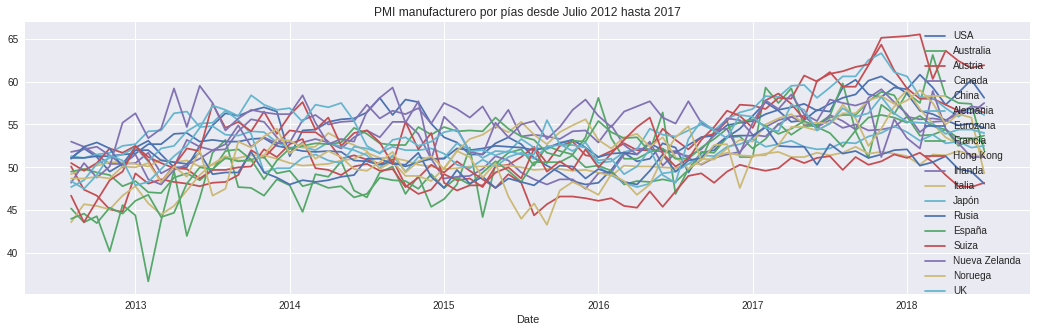

In [6]:
data.plot(figsize=(18, 5))
plt.title("PMI manufacturero por pías desde Julio 2012 hasta 2017")


Podemos ver que dificilmente podemos seguir la evolución del PMI de un país, si quiera podemos diferenciar los PMI de cada país. Para que hablar si queremos saber el PMI correspondiente a cada mes. 

####**...Aparecen los HEATMAPS**

Lo mejor es que son muy fáciles de construir. Sólo tenemos que tener los datos listos. Para este caso solo hubo que transponer la tabla y tendremos un gráfico muy limpio y profesional que entrega información relevante para la toma de decisiones de inversión. 

Se recomienda incoporar tendencias, para este caso utilizamos la media trimestral móvil y aplicamos un zscore

Text(0.5, 1.0, 'PMI Manufacturero por país')

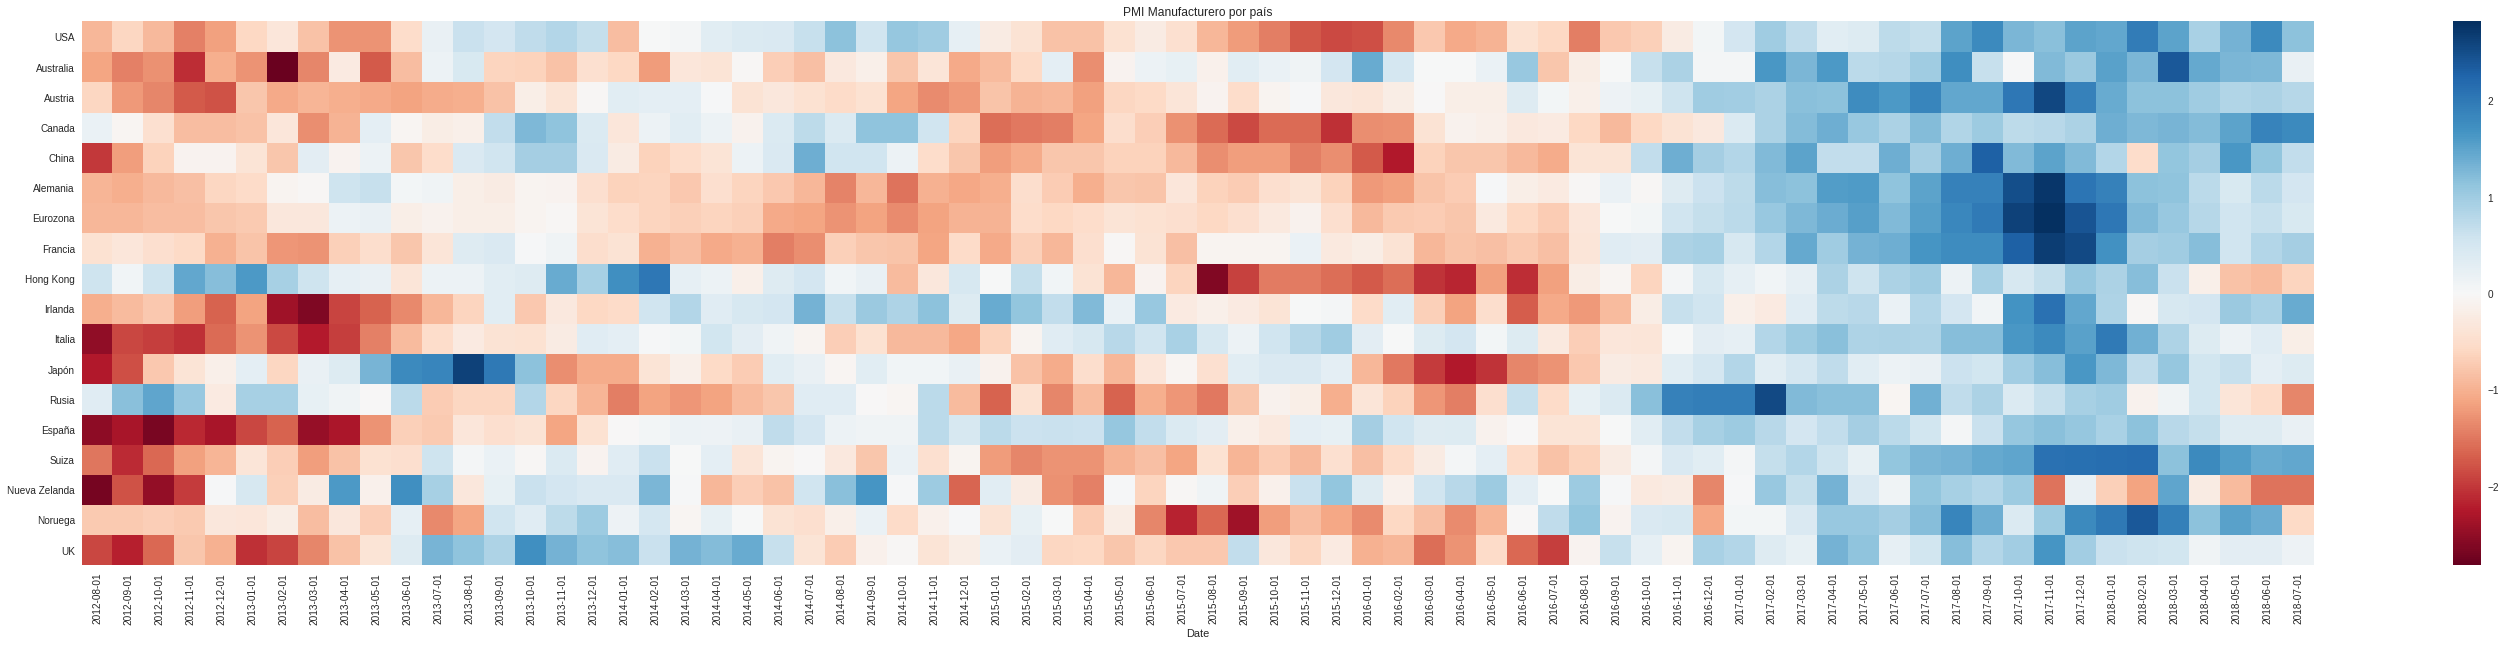

In [7]:
plt.figure(figsize=(50,10))
sns.heatmap(heatmap, cmap="RdBu",annot=False)
plt.title("PMI Manufacturero por país")


Con esto ya podemos armarnos un panorama general de la evolución en las expectativas económicas. 

- Mientras más azul mejores perspectivas económicas.
- Mientras más rojo peores perspectivas económicas.

Con la información que tenemos (Hasta Julio de 2018) vemos que las perspectivas económicas se mantienen en niveles positivos, pero con tendencia a la baja con respecto a la muestra.

**Graficamos la mediana global junto con el rango de percentil 75 y percentil 25**

Vemos que el impulso que llevaba hasta 2017 lo ha ido perdiendo durante 2018, recordemos, tenemos información hasta Julio. No podemos decir de 2019 con esta información. 

Esto junto con el trabajo "Coyuntura de Renta Fija", nos permite inferir que el mundo se acerca a períodos de desaceleración. Ya lo leemos en este gráfico, las empresas esperan contratar y expandirse menos que a inicios de 2018. Junto a los spreads del Tesoro Norteamericano que cada vez han ido acercandose a cero, lo que señala que la expectativa del mercado es de mayor incertidumbre económica y menor crecimiento en el corto plazo en compración al largo plazo.



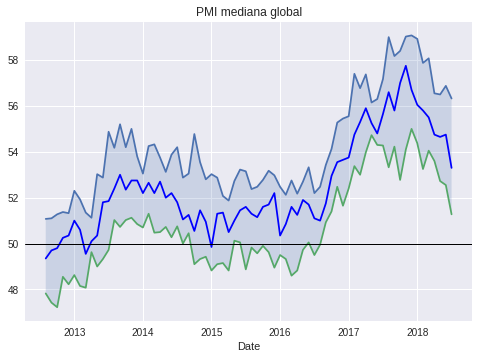

In [8]:
promedio = data.T.median()
p25 = data.T.quantile(0.25)
p75 = data.T.quantile(0.75)
promedio.plot(c="b")
p75.plot()
p25.plot()
plt.fill_between(promedio.index, p75, p25, alpha=0.2)
plt.title("PMI mediana global")
plt.axhline(50, color="black", lw=1)

####**Con información mensual a trimestral**

A pesar de lo bonito del gráfico con frecuencia mensual, tenerlo en dicho formato lo hace muy largo, lo que puede llevar a confusiones. Una frecuencia trimestral no nos hará perder mucha información y será más digerible para cuando analizamos la evolución de varios años.

In [0]:
data_quarterly = data2.T
heatmap_q = data_quarterly.groupby(pd.PeriodIndex(data_quarterly.columns, freq='Q'), axis=1).mean()
heatmap_q.head(3)

Date,2012Q3,2012Q4,2013Q1,2013Q2,2013Q3,2013Q4,2014Q1,2014Q2,2014Q3,2014Q4,...,2016Q2,2016Q3,2016Q4,2017Q1,2017Q2,2017Q3,2017Q4,2018Q1,2018Q2,2018Q3
USA,-0.776459,-1.161563,-0.581407,-1.021525,0.448871,0.738949,-0.271323,0.388855,0.788963,0.788963,...,-0.821471,-0.931501,-0.271323,0.748952,0.478879,1.329108,1.329108,1.649195,1.349114,1.159062
Australia,-1.270938,-1.473244,-1.812596,-0.957690,-0.004894,-0.637916,-0.703176,-0.376876,-0.435610,-0.742332,...,0.425821,-0.331194,0.530237,1.000109,1.065369,1.130629,0.778225,1.737547,1.339461,0.216989
Austria,-0.916191,-1.638417,-0.934902,-1.069617,-0.964838,-0.201450,0.299992,-0.231387,-0.470881,-1.219301,...,0.000624,0.023076,0.606844,1.018475,1.512432,1.602243,2.171042,1.250485,0.913696,0.801433


Teniendo lista la tabla con frecuencia trimestral, estamos listos para crear nuestro heatmap.

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5, 24.5]), <a list of 25 Text xticklabel objects>)

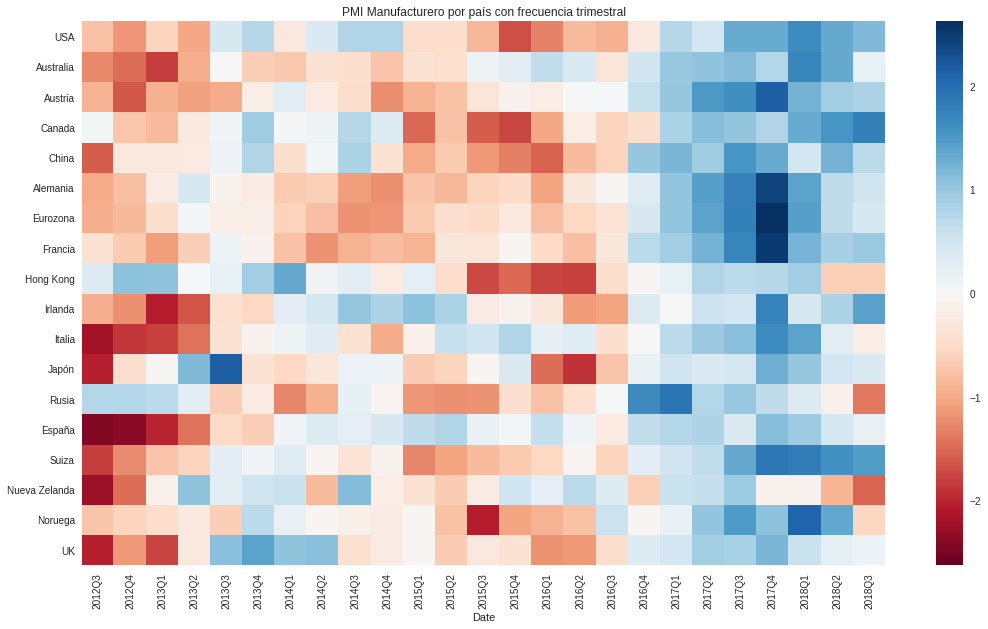

In [0]:
plt.figure(figsize=(18,10))
sns.heatmap(heatmap_q, cmap="RdBu",annot=False, center=0)
plt.title("PMI Manufacturero por país con frecuencia trimestral")
plt.xticks(rotation=90)

### **Fuentes**:

https://www.bloomberg.com/graphics/global-pmi-tracker/


Más sobre los PMI [aquí](https://www.markiteconomics.com/public)